In [1]:
%matplotlib inline
import math
import time
import numpy as np

import torch


In [2]:
import sys 

In [3]:
sys.path.append('../../../')

In [4]:
import torch

In [5]:
torch.__version__

'2.0.0'

In [6]:
import torchvision

In [7]:
torchvision.__version__

'0.15.1'

In [8]:
from omd2l.data.FashionMNIST import FashionMNIST

In [9]:
from omd2l.models.base import Trainer

In [10]:
from omd2l.models.linear import LinearRegressionScratch

In [11]:
from omd2l.models.MLP import MLPScratch
from omd2l.models.MLP import MLP
 
from omd2l.models.MLP import DropoutMLPScratch
from omd2l.models.MLP import DropoutMLP


# MLP

## MLP from scratch

In [12]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)


In [13]:
data = FashionMNIST(batch_size=256)

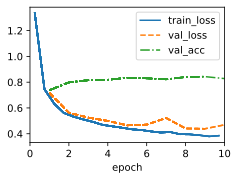

In [14]:

trainer = Trainer(max_epochs=10)
trainer.fit(model, data)

## Concise implementation

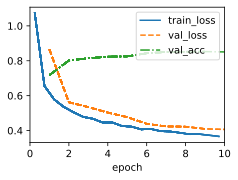

In [15]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

# Dropout MLP

## Dropout MLP from scratch 

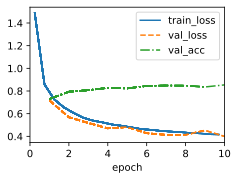

In [16]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLPScratch(**hparams)
data = FashionMNIST(batch_size=256)
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)

## Dropout MLP

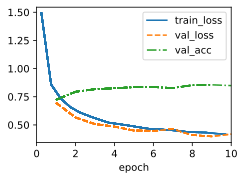

In [17]:
model = DropoutMLP(**hparams)
trainer.fit(model, data)

# Shared Parameters 

In [18]:
from torch import nn
from omd2l.models.base.Classifier import Classifier
from omd2l.models.optimizer.SGD import SGD
import omd2l.utils.compute  as compute


class SharedParametersMLP(Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        shared = nn.LazyLinear(num_hiddens)
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_hiddens),
                                 nn.ReLU(),
                                 shared,
                                 nn.ReLU(),
                                 shared,
                                 nn.ReLU(),
                                 nn.LazyLinear(num_outputs))

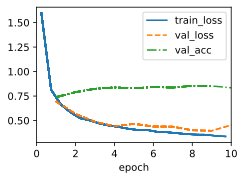

In [19]:
shared_model = SharedParametersMLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(shared_model, data)